In [78]:
import pandas as pd
import numpy as np

from sklearn.base import clone 

import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as scs

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from rfpimp import permutation_importances

In [3]:
tdf = pd.read_csv('data/TEAMstats - TeamPer100.csv')

In [4]:
tdfopp = pd.read_csv('data/TEAMstats - OppPer100.csv')

In [5]:
adv = pd.read_csv('data/TEAMstats - AdvancedTeam.csv')

In [6]:
tdf.head()

,Team,YR,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Golden State Warriors*,17-18,82,19730,42.9,85.3,0.503,11.3,28.9,0.391,...,0.815,8.4,35.1,43.6,29.3,8.0,7.5,15.5,19.6,113.6
1,Houston Rockets*,17-18,82,19755,39.5,86.0,0.460,15.6,43.2,0.362,...,0.781,9.2,35.2,44.4,22.0,8.7,4.9,14.1,19.9,114.7
2,New Orleans Pelicans*,17-18,82,19955,41.9,86.6,0.483,10.0,27.7,0.362,...,0.772,8.5,35.0,43.5,26.3,7.9,5.8,14.6,18.8,109.6
3,Toronto Raptors*,17-18,82,19830,42.0,89.1,0.472,12.0,33.6,0.358,...,0.794,9.9,34.9,44.8,24.8,7.8,6.2,13.6,22.2,113.8
4,Cleveland Cavaliers*,17-18,82,19730,41.1,86.3,0.476,12.2,32.7,0.372,...,0.779,8.6,34.3,42.9,23.8,7.2,3.9,14.0,18.9,112.9


In [7]:
tdfopp.head()

,Rk,Team,Year,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Utah Jazz*,17-18,82,19755,38.8,86.4,0.449,9.9,27.0,...,0.771,9.0,34.3,43.3,20.8,8.6,4.8,15.5,21.4,103.9
1,2,San Antonio Spurs*,17-18,82,19730,40.1,88.5,0.453,9.6,27.6,...,0.759,9.7,35.0,44.6,22.9,8.0,4.1,14.8,20.7,104.8
2,3,Boston Celtics*,17-18,82,19805,38.7,88.0,0.440,9.7,28.6,...,0.763,10.0,35.4,45.4,22.0,7.5,4.6,14.6,19.8,103.9
3,4,Miami Heat*,17-18,82,19930,38.9,86.6,0.450,9.9,27.5,...,0.783,9.4,35.2,44.5,21.7,7.8,4.8,14.6,20.0,106.3
4,5,Portland Trail Blazers*,17-18,82,19755,39.6,88.7,0.447,10.0,27.4,...,0.755,9.6,34.7,44.3,20.8,7.6,5.3,13.0,19.7,106.4


In [8]:
adv.head()

,Rk,Team,Year,Age,W,L,PW,PL,MOV,SOS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Houston Rockets*,17-18,29.8,65,17,61,21,8.48,-0.27,...,12.7,21.3,0.233,0.521,13.4,79.9,0.171,Toyota Center,"732,722","17,871"
1,2,Toronto Raptors*,17-18,25.8,59,23,60,22,7.78,-0.49,...,12.1,23.0,0.198,0.501,13.0,77.7,0.212,Air Canada Centre,"813,431","19,840"
2,3,Golden State Warriors*,17-18,28.8,58,24,56,26,5.98,-0.19,...,14.1,21.0,0.195,0.504,12.6,76.3,0.186,Oracle Arena,"803,436","19,596"
3,4,Utah Jazz*,17-18,26.7,48,34,53,29,4.30,0.17,...,13.7,21.5,0.202,0.506,14.0,79.8,0.190,Vivint Smart Home Arena,"734,806","17,922"
4,5,Philadelphia 76ers*,17-18,25.8,52,30,53,29,4.50,-0.20,...,14.6,25.3,0.198,0.492,12.6,78.6,0.218,Wells Fargo Center,"833,503","20,361"


In [9]:
adv['test'] = adv['Team'].str.replace('*', '')

In [10]:
adv.drop('test', axis=1, inplace=True)

In [11]:
adv.head()

,Rk,Team,Year,Age,W,L,PW,PL,MOV,SOS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Houston Rockets*,17-18,29.8,65,17,61,21,8.48,-0.27,...,12.7,21.3,0.233,0.521,13.4,79.9,0.171,Toyota Center,"732,722","17,871"
1,2,Toronto Raptors*,17-18,25.8,59,23,60,22,7.78,-0.49,...,12.1,23.0,0.198,0.501,13.0,77.7,0.212,Air Canada Centre,"813,431","19,840"
2,3,Golden State Warriors*,17-18,28.8,58,24,56,26,5.98,-0.19,...,14.1,21.0,0.195,0.504,12.6,76.3,0.186,Oracle Arena,"803,436","19,596"
3,4,Utah Jazz*,17-18,26.7,48,34,53,29,4.30,0.17,...,13.7,21.5,0.202,0.506,14.0,79.8,0.190,Vivint Smart Home Arena,"734,806","17,922"
4,5,Philadelphia 76ers*,17-18,25.8,52,30,53,29,4.50,-0.20,...,14.6,25.3,0.198,0.492,12.6,78.6,0.218,Wells Fargo Center,"833,503","20,361"


In [12]:
def update_team_name(df, team, yr):
    df[team] = df[team].str.replace('*', '')
    df[team] = df[team] + ' ' + df[yr]
    return df

In [13]:
adv = update_team_name(adv, 'Team', 'Year')

In [14]:
tdf = update_team_name(tdf, 'Team', 'YR')

In [15]:
tdfopp = update_team_name(tdfopp, 'Team', 'Year')

In [16]:
tdfopp.columns = tdfopp.columns + 'opp'

In [19]:
tdf.head()

,Team,YR,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Golden State Warriors 17-18,17-18,82,19730,42.9,85.3,0.503,11.3,28.9,0.391,...,0.815,8.4,35.1,43.6,29.3,8.0,7.5,15.5,19.6,113.6
1,Houston Rockets 17-18,17-18,82,19755,39.5,86.0,0.460,15.6,43.2,0.362,...,0.781,9.2,35.2,44.4,22.0,8.7,4.9,14.1,19.9,114.7
2,New Orleans Pelicans 17-18,17-18,82,19955,41.9,86.6,0.483,10.0,27.7,0.362,...,0.772,8.5,35.0,43.5,26.3,7.9,5.8,14.6,18.8,109.6
3,Toronto Raptors 17-18,17-18,82,19830,42.0,89.1,0.472,12.0,33.6,0.358,...,0.794,9.9,34.9,44.8,24.8,7.8,6.2,13.6,22.2,113.8
4,Cleveland Cavaliers 17-18,17-18,82,19730,41.1,86.3,0.476,12.2,32.7,0.372,...,0.779,8.6,34.3,42.9,23.8,7.2,3.9,14.0,18.9,112.9


In [24]:
tdfopp = tdfopp.rename(index=str, columns={'Yearopp': 'YR'})

In [25]:
tdfopp.head()

,Rkopp,Team,YR,Gopp,MPopp,FGopp,FGAopp,FG%opp,3Popp,3PAopp,...,FT%opp,ORBopp,DRBopp,TRBopp,ASTopp,STLopp,BLKopp,TOVopp,PFopp,PTSopp
0,1,Utah Jazz 17-18,17-18,82,19755,38.8,86.4,0.449,9.9,27.0,...,0.771,9.0,34.3,43.3,20.8,8.6,4.8,15.5,21.4,103.9
1,2,San Antonio Spurs 17-18,17-18,82,19730,40.1,88.5,0.453,9.6,27.6,...,0.759,9.7,35.0,44.6,22.9,8.0,4.1,14.8,20.7,104.8
2,3,Boston Celtics 17-18,17-18,82,19805,38.7,88.0,0.440,9.7,28.6,...,0.763,10.0,35.4,45.4,22.0,7.5,4.6,14.6,19.8,103.9
3,4,Miami Heat 17-18,17-18,82,19930,38.9,86.6,0.450,9.9,27.5,...,0.783,9.4,35.2,44.5,21.7,7.8,4.8,14.6,20.0,106.3
4,5,Portland Trail Blazers 17-18,17-18,82,19755,39.6,88.7,0.447,10.0,27.4,...,0.755,9.6,34.7,44.3,20.8,7.6,5.3,13.0,19.7,106.4


In [26]:
tdf_merged = pd.merge(tdf, tdfopp, on=['Team', 'YR'], how='outer')

In [27]:
tdf_merged.head()

,Team,YR,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%opp,ORBopp,DRBopp,TRBopp,ASTopp,STLopp,BLKopp,TOVopp,PFopp,PTSopp
0,Golden State Warriors 17-18,17-18,82,19730,42.9,85.3,0.503,11.3,28.9,0.391,...,0.758,10.9,31.7,42.6,23.6,8.8,3.7,14.4,18.5,107.6
1,Houston Rockets 17-18,17-18,82,19755,39.5,86.0,0.460,15.6,43.2,0.362,...,0.746,8.8,34.1,42.9,22.9,7.6,4.5,14.9,20.8,106.1
2,New Orleans Pelicans 17-18,17-18,82,19955,41.9,86.6,0.483,10.0,27.7,0.362,...,0.784,10.6,34.0,44.6,23.3,8.0,4.1,14.2,20.0,108.3
3,Toronto Raptors 17-18,17-18,82,19830,42.0,89.1,0.472,12.0,33.6,0.358,...,0.767,10.0,33.2,43.2,22.2,7.3,5.0,14.6,20.3,105.9
4,Cleveland Cavaliers 17-18,17-18,82,19730,41.1,86.3,0.476,12.2,32.7,0.372,...,0.756,10.1,34.3,44.4,26.3,7.6,4.2,13.7,21.1,111.9


In [31]:
adv.head()

,Rk,Team,YR,Age,W,L,PW,PL,MOV,SOS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Houston Rockets 17-18,17-18,29.8,65,17,61,21,8.48,-0.27,...,12.7,21.3,0.233,0.521,13.4,79.9,0.171,Toyota Center,"732,722","17,871"
1,2,Toronto Raptors 17-18,17-18,25.8,59,23,60,22,7.78,-0.49,...,12.1,23.0,0.198,0.501,13.0,77.7,0.212,Air Canada Centre,"813,431","19,840"
2,3,Golden State Warriors 17-18,17-18,28.8,58,24,56,26,5.98,-0.19,...,14.1,21.0,0.195,0.504,12.6,76.3,0.186,Oracle Arena,"803,436","19,596"
3,4,Utah Jazz 17-18,17-18,26.7,48,34,53,29,4.30,0.17,...,13.7,21.5,0.202,0.506,14.0,79.8,0.190,Vivint Smart Home Arena,"734,806","17,922"
4,5,Philadelphia 76ers 17-18,17-18,25.8,52,30,53,29,4.50,-0.20,...,14.6,25.3,0.198,0.492,12.6,78.6,0.218,Wells Fargo Center,"833,503","20,361"


In [32]:
toa_df = pd.merge(tdf_merged, adv, on=['Team', 'YR'], how='outer')

In [34]:
toa_df = toa_df.drop(['Arena', 'Attend.','Attend./G'], axis=1)

In [49]:
toa_df = toa_df.drop(['G', 'MP', 'Rkopp','Gopp','MPopp','Rk', 'W','L',], axis=1)

In [50]:
toa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 65 columns):
Team        360 non-null object
YR          360 non-null object
FG          360 non-null float64
FGA         360 non-null float64
FG%         360 non-null float64
3P          360 non-null float64
3PA         360 non-null float64
3P%         360 non-null float64
2P          360 non-null float64
2PA         360 non-null float64
2P%         360 non-null float64
FT          360 non-null float64
FTA         360 non-null float64
FT%         360 non-null float64
ORB         360 non-null float64
DRB         360 non-null float64
TRB         360 non-null float64
AST         360 non-null float64
STL         360 non-null float64
BLK         360 non-null float64
TOV         360 non-null float64
PF          360 non-null float64
PTS         360 non-null float64
FGopp       360 non-null float64
FGAopp      360 non-null float64
FG%opp      360 non-null float64
3Popp       360 non-null float64
3PAopp

In [40]:
target = pd.read_csv('data/TEAMstats - target.csv')

In [45]:
target = update_team_name(target, 'Team', 'YR')

In [54]:
target = target.drop(['Team','YR'], axis=1)

In [55]:
target.head()

,ConfFinals
0,1
1,1
2,0
3,0
4,1


In [51]:
twt_df = pd.merge(toa_df, target, on=['Team', 'YR'], how='outer')

In [56]:
twt_df = twt_df.drop('ConfFinals', axis=1)

In [57]:
twt_df = twt_df.drop('YR', axis=1)

In [62]:
twt_df = twt_df.drop('Team', axis=1)

In [70]:
twt_df = twt_df.drop(['MOV', 'SRS', 'SOS', 'PL', 'PW'], axis=1)


In [110]:
twt_df_wo = twt_df.drop(['NRtg', 'DRtg', 'ORtg', 'PTS', 'PTSopp'], axis=1)

In [115]:
twt_df_wo.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'FGopp',
       'FGAopp', 'FG%opp', '3Popp', '3PAopp', '3P%opp', '2Popp', '2PAopp',
       '2P%opp', 'FTopp', 'FTAopp', 'FT%opp', 'ORBopp', 'DRBopp', 'TRBopp',
       'ASTopp', 'STLopp', 'BLKopp', 'TOVopp', 'PFopp', 'Age', 'Pace', 'FTr',
       '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1'],
      dtype='object')

In [116]:
df_percentages = twt_df_wo[['FG%', '3P%', '2P%',
       'FT%','FG%opp', '3P%opp',
       '2P%opp','FTAopp', 'Age', 'Pace', 'FTr',
       '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1']]

In [120]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_percentages, target, 
                                                    random_state=42)

In [121]:
# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=40, n_jobs=-1)
rf.fit(X_train_2, y_train_2)
                          

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [122]:
# Test Prediction
pred_p = rf.predict(X_test_2)
print('Accuracy score: {:.3}'.format(rf.score(X_test_2, y_test_2)))

Accuracy score: 0.878


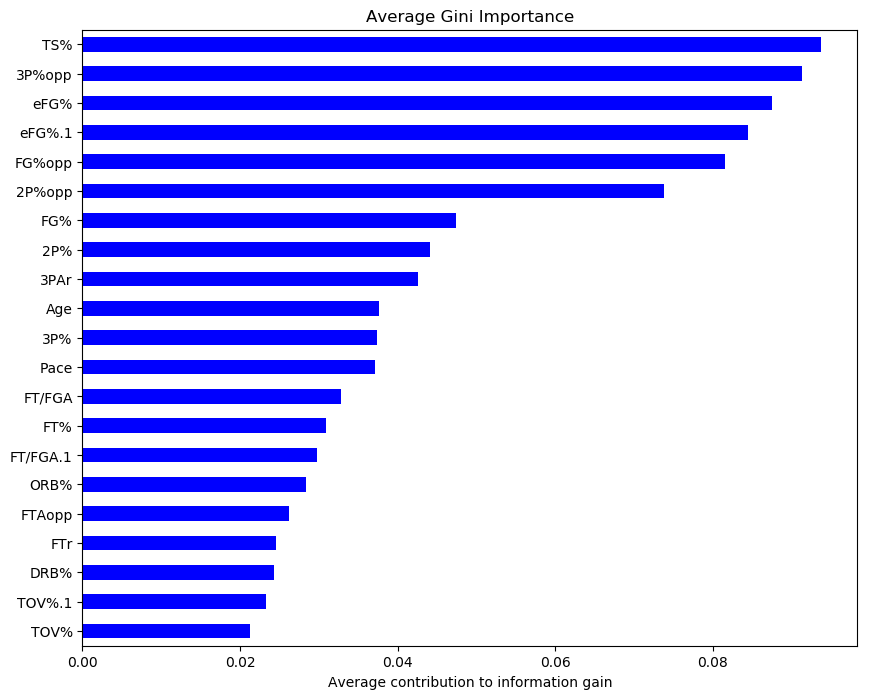

In [125]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=df_percentages.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');


In [126]:
def r2(rf, X_train_2, y_train_2):
    return r2_score(y_train_2, rf.predict(X_train_2))

perm_imp_rfpimp = permutation_importances(rf, X_train_2, y_train_2, r2)

In [127]:
perm_imp_rfpimp

,Importance
Feature,
3P%opp,0.176087
TS%,0.029348
FG%opp,0.029348
eFG%.1,0.029348
FT/FGA,0.029348
eFG%,0.029348
FG%,0.000000
DRB%,0.000000
TOV%.1,0.000000


In [100]:
def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
        print(benchmark_score - drop_col_score)
    
    return importances

In [129]:
imps = drop_col_feat_imp(rf, X_train_2, y_train_2, random_state = 42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KeyboardInterrupt: 